# LIBRERIAS

In [3]:
# Librerias EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import f_classif, SelectKBest
import numpy as np
import json
from pickle import dump

# Librerias ML

from sklearn.linear_model import LinearRegression, Lasso, ElasticNetCV, Ridge

from sklearn.metrics import mean_squared_error, r2_score

# PASO 1: Planteamiento del problema y Recopilación de Datos.

##### PLANTEAMIENTO DEL PROBLEMA:

- Queremos predecir si un paciente tiene diabetes a partir de medidas diagnósticas


##### RECOPILACION DE DATOS:
-------------------------------------------------------

In [4]:
#Recopilamos datos
data_url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"
sep = (",")

def DataCompiler(url, sep):
    data = pd.read_csv(url, sep = sep)

    #Guardamos el csv en local
    data.to_csv("../data/raw/raw_data.csv", sep=";")

    return data

data = DataCompiler(data_url, sep)

data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# PASO 2: Exploración y Limpieza de Datos.

- #### Obtener dimensiones del dataset
-------------------------------------------------------

In [7]:
#Obtenemos informacion sobre el dataset

def DataInfo(dataset):
    print(f"Dataset dimensions: {dataset.shape}")
    print(f"\nDataset information:\n{dataset.info()}")
    print(f"\nDataset nan-values: {dataset.isna().sum().sort_values(ascending=False)}")
    

DataInfo (data)

Dataset dimensions: (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Dataset information:
None

Dataset nan-values: Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI          

##### CONCLUSIONES:
-------------------------------------------------------

- Dimensiones: 3140, 108
- Valores nulos: Sin valores nulos.
- Tipo de datos:
    - Pregnacy: Discreta.
    - Glucose: Continua.
    - BloodPressure: Continua.
    - SkinThickness: Continua.
    - Insulin: Continua.
    - BMI: Continua
    - DiabetesPedigreeFunction: Continua
    - Age: Continua.
    - Outcome: Discreta (Target)

- #### Eliminacion de Duplicados
---------------------------------------------

In [ ]:
#Funcion para eliminar duplicados

#Columna identificadora del Dataset.

def EraseDuplicates(dataset, current_id = ""):
    older_shape = dataset.shape
    id = current_id
    
    if (id != ""):
        dataset.drop(id , axis = 1, inplace = True)
                     
    if (dataset.duplicated().sum()):
        print(f"Total number of duplicates {dataset.duplicated().sum()}")
        print ("Erase duplicates...")
        dataset.drop_duplicates(inplace = True)
    else:
        print ("No coincidences.")
        pass
    
    print (f"The older dimension of dataset is {older_shape}, and the new dimension is {dataset.shape}.")
    
    return dataset

data = EraseDuplicates(data)

No coincidences.
The older dimension of dataset is (768, 9), and the new dimension is (768, 9).


- #### Eliminacion de datos irrelevantes.
-----------------------------------------------------------------------------------

- Este Dataset es muy pequeño como para quitarle datos a priori.

In [13]:
#Funcion para eliminar datos irrelevantes a traves de una lista dada.

irrelevant_lst = []

def EraseIrrelevants(dataset, lst):
    older_shape = data.shape
    print("Erase irrelevant´s dates...")
    dataset.drop(lst, axis = 1, inplace = True)
    print (f"The old dimension of dataset is {older_shape}, and the new dimension is {dataset.shape}.")
    return dataset

# PASO 3: Analisis de variables univariantes

- #### Analisis sobre variables categóricas
--------------------------------------------------------------

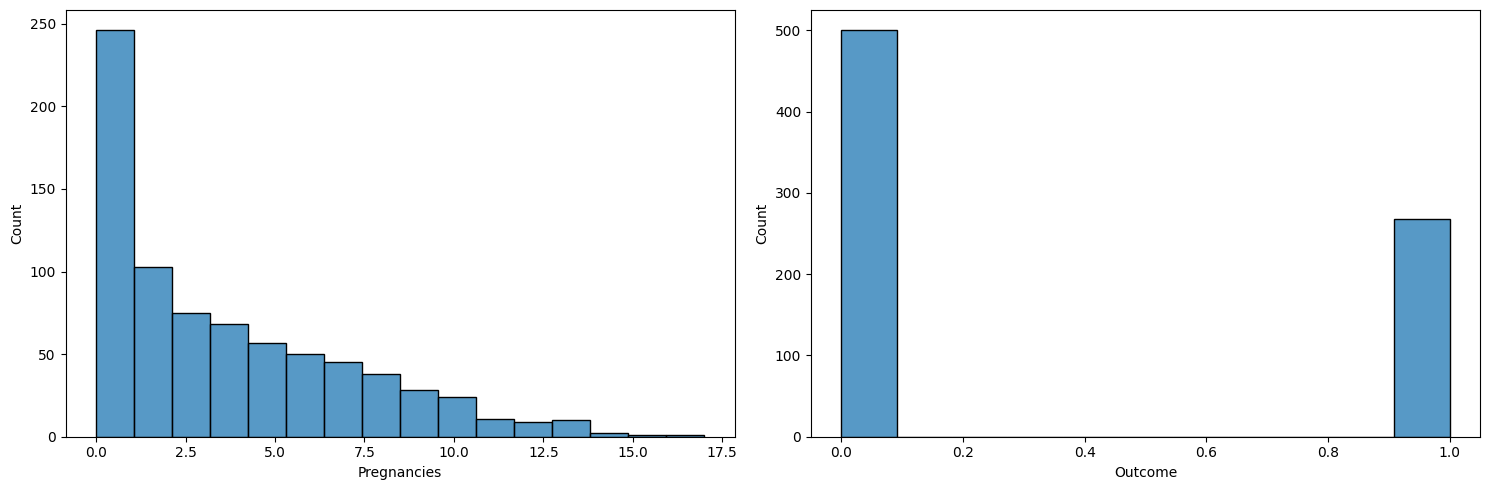

In [37]:
#Analisis sobre variables categoricas

categoric_predictors = ["Pregnancies", "Outcome"]

def CategoricGraf(dataset, lst):
    #Creamos la figura
    fig, axis = plt.subplots(1, 2, figsize=(15,5))

    #Creamos las graficas necesarias
    for i in range(len(lst)):
        sns.histplot( ax = axis[i], data = dataset, x = lst[i])
   

    #Mostramos el grafico.
    plt.tight_layout()
    plt.show()

CategoricGraf(data, categoric_predictors)

#### CONCLUSIONES:
------------------------------------------------------

- La mayor parte de la muestra no ha estado embarazado.

- #### Analisis sobre variables continuas
-----------------------------------------------------------------------

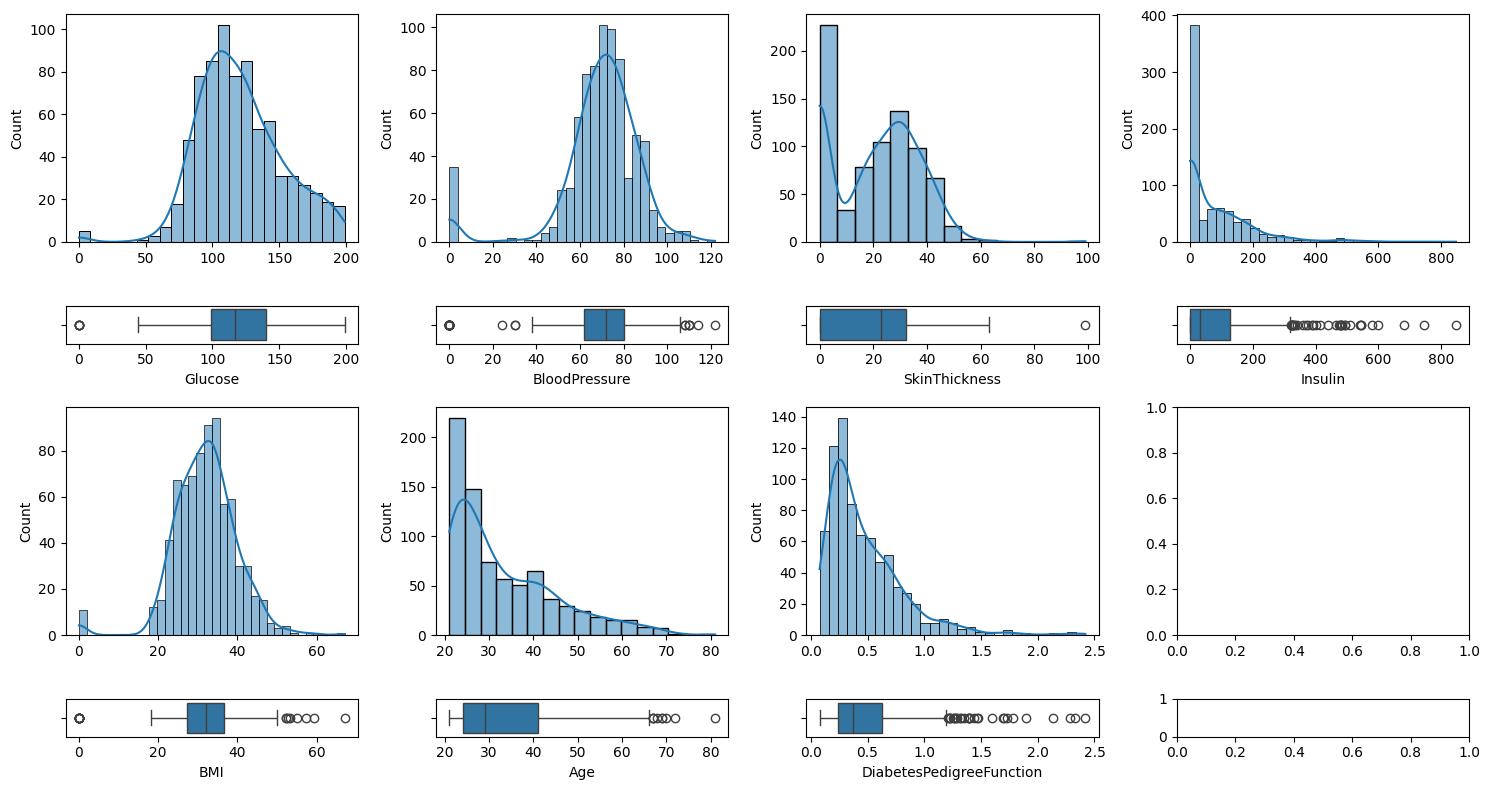

In [45]:
# Analisis sobre variables numericas

continuous_lst = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age", "DiabetesPedigreeFunction"]
vector_ax = [4,4]

def NumericalGraf(dataset, lst, ax_dimension):

    x_pos = 0
    y_pos = 0
    #Creamos la figura
    fig, axis = plt.subplots(ax_dimension[0], ax_dimension[1], figsize=(15,8), gridspec_kw={"height_ratios" : [6,1,6,1]})

    #Creamos las graficas necesarias
    for i in range(len(lst)):
       sns.histplot( ax = axis[x_pos,y_pos], data = dataset, x = lst[i], kde = True).set(xlabel = None)
       sns.boxplot( ax = axis[x_pos + 1,y_pos], data = dataset, x = lst[i])
       y_pos += 1
       if (y_pos == ax_dimension[1]):
           x_pos += 2
           y_pos = 0
    
    plt.tight_layout()
    plt.show()

NumericalGraf(data, continuous_lst, vector_ax)

##### CONCLUSIONES
-----------------------------------------------

- Glucose:
    - Distribución normal.
    - Media 120
    - Low Outlier en 40
- BloodPresure:
    - Distribución normal.
    - Media 75
    - Low Outlier en 38
- SkinThinckness:
    - Distribución asimétrica positiva.
    - Media 23
- Insulin:
    - Distribución asimétrica positiva.
    - Media 30
- BMI:
    - Distribución normal.
    - Media 32
    - Low Outlier 19
- Age:
    - Distribución asimétrica positiva.
    - Media 28
    - Low Outlier 21
- DiabetesPedigreeFunction:
    - Distribución asimétrica positiva.
    - Media 0.4


# PASO 4: Analisis de variable multivariante

- Analisis Outcome (Pregnacy) Categorico-Categorico
----------------------------------------------------------------------

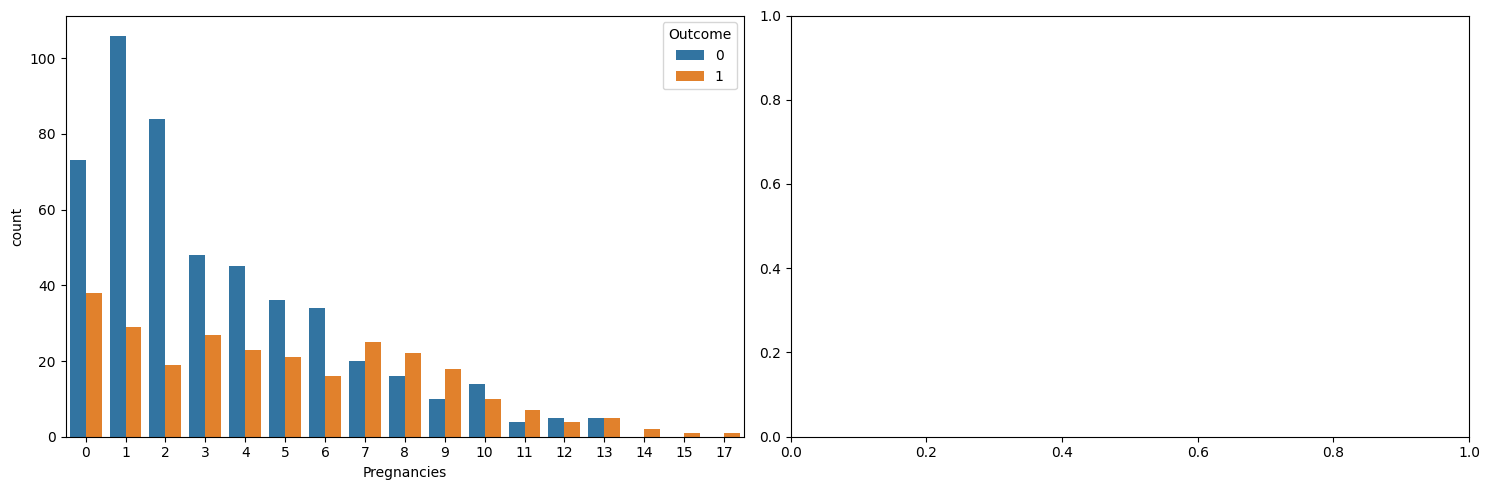

In [41]:
#Analisis Categorico/categorico
target = "Outcome"
categoric_predictors = ["Pregnancies"]

def CatCatAnalysi(dataset, target, lst):
    #Creamos la figura
    fig, axis = plt.subplots(1, 2, figsize=(15,5))

    #Creamos las graficas.
    for i in range(len(lst)):
        sns.countplot(ax = axis[i], data = dataset, x = lst[i], hue = target)


    plt.tight_layout()
    plt.show()

CatCatAnalysi(data, target, categoric_predictors)

##### CONCLUSIONES:
------------------------------------

-Vemos que cuantos más embarazos ha tenido el paciente más posible es que tenga diabetes.

- Analisis Continuo/Continuo
---------------------------------------------------

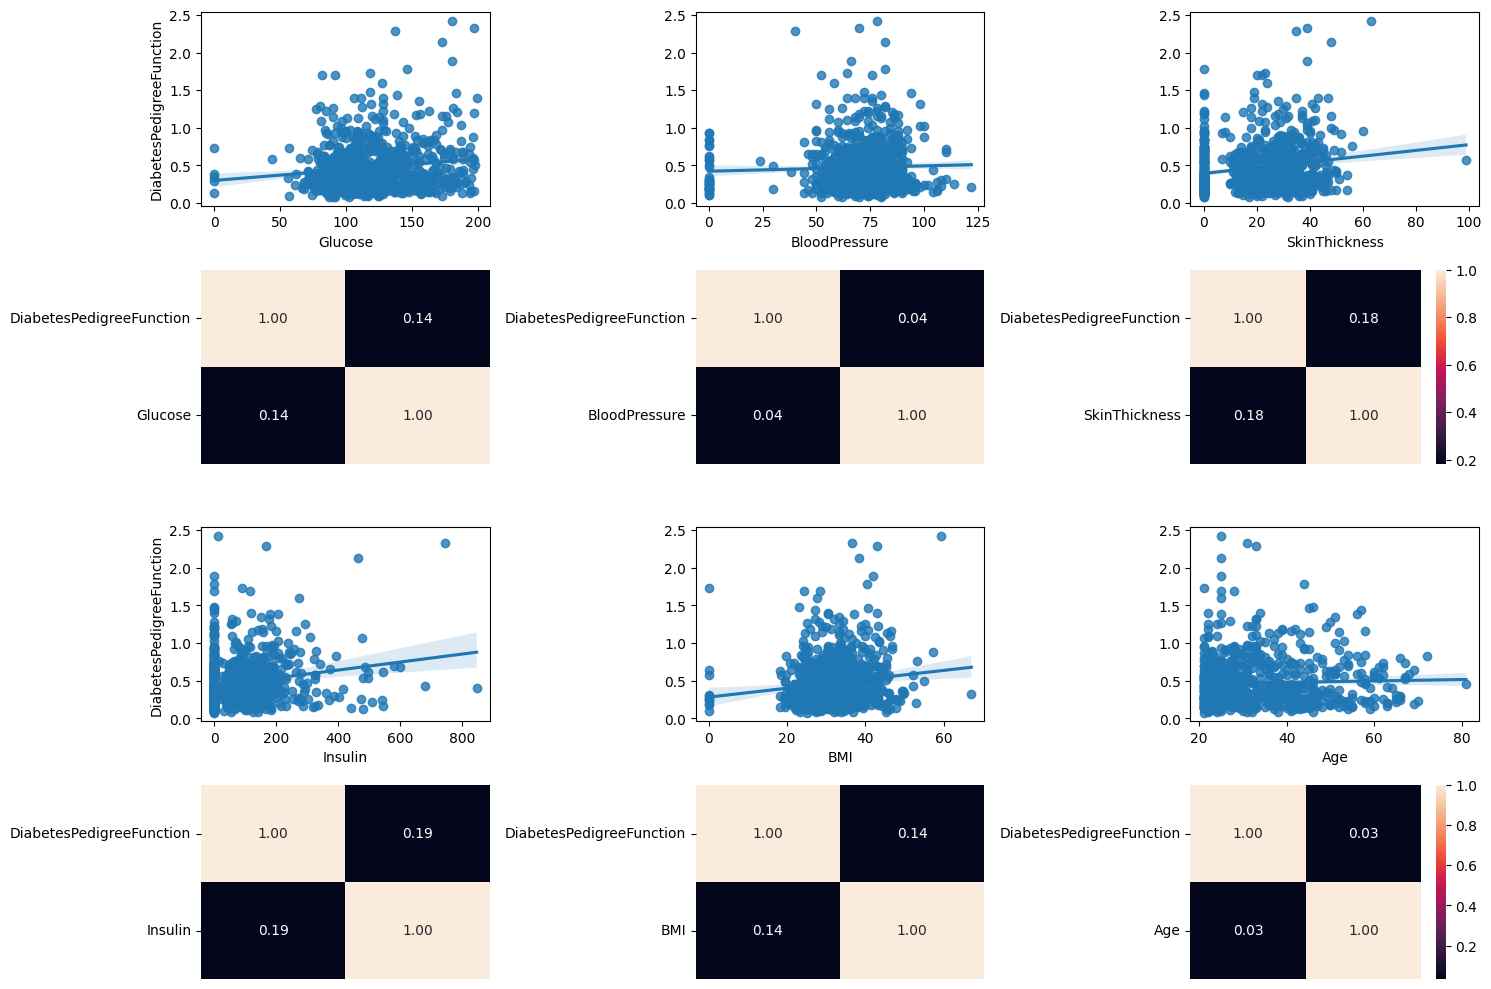

In [50]:
continuous_y = "DiabetesPedigreeFunction"
continuous_lst = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]
vector_ax = [4,3]

def NumNumAnalysi(dataset, y, x_list, ax_dimension):
    #Creamos la figura
    fig, axis = plt.subplots(ax_dimension[0], ax_dimension[1], figsize=(15,10))

    x_pos = 0
    y_pos = 0

    for i in range(len(x_list)):
        if (y_pos == 0):
            sns.regplot( ax = axis[x_pos, y_pos], data = dataset, x = x_list[i], y = y)
        else:
            sns.regplot( ax = axis[x_pos, y_pos], data = dataset, x = x_list[i], y = y).set(ylabel = None)

        if (y_pos < ax_dimension[1] - 1):
            sns.heatmap( data[[y,x_list[i]]].corr(), annot=True, fmt=".2f", ax = axis[x_pos + 1, y_pos], cbar=False, xticklabels = False)
        else:
            sns.heatmap( data[[y,x_list[i]]].corr(), annot = True, fmt = ".2f", ax = axis[x_pos + 1, y_pos], xticklabels = False) 
        
        y_pos = y_pos + 1
        if (y_pos == ax_dimension[1]):
            y_pos = 0
            x_pos = x_pos + 2
    
    plt.tight_layout()
    plt.show()

NumNumAnalysi(data, continuous_y, continuous_lst, vector_ax)